In [1]:
import pandas as pd
import numpy as np
from sklearn import cluster
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df=pd.read_excel('cars.xls')

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
x=df[["Price","Mileage","Cylinder"]]

In [6]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [7]:
model=KMeans(4)

In [8]:
model=model.fit(x)

In [9]:
tahmin=model.predict(x)

In [10]:
tahmin

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 3, 1,
       1, 3, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [11]:
x['cluster']=tahmin

In [12]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,0
1,17542.036083,9135,6,0
2,16218.847862,13196,6,0
3,16336.913140,16342,6,0
4,16339.170324,19832,6,1


In [13]:
silhouette_score(x,tahmin)

0.4139683894708895

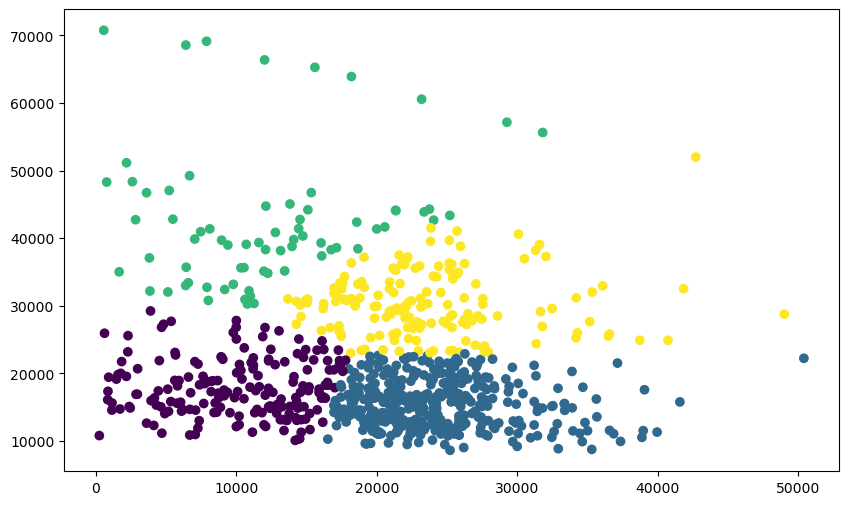

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=tahmin);

In [15]:
allscore=[]
allcluster=[]
distances=[]
def fnc_clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_
        print("Cluster..:",i," Score..:", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [16]:
fnc_clust(10)

Cluster..: 2  Score..: 0.4511454197178761
Cluster..: 3  Score..: 0.4126449693038195
Cluster..: 4  Score..: 0.4132860971911873
Cluster..: 5  Score..: 0.35440768956096136
Cluster..: 6  Score..: 0.36081692899347007
Cluster..: 7  Score..: 0.3668071319695023
Cluster..: 8  Score..: 0.36535739784871174
Cluster..: 9  Score..: 0.34844851796827253
Cluster..: 10  Score..: 0.35524140935054443


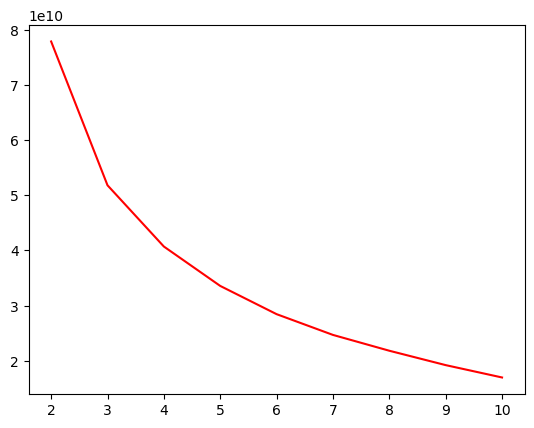

In [17]:
plt.plot(allcluster,distances,color='Red');
#Elbow Dirsek Metodu

# Hierarchical Clustering

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
link_data=linkage(x,method="ward",metric="euclidean")

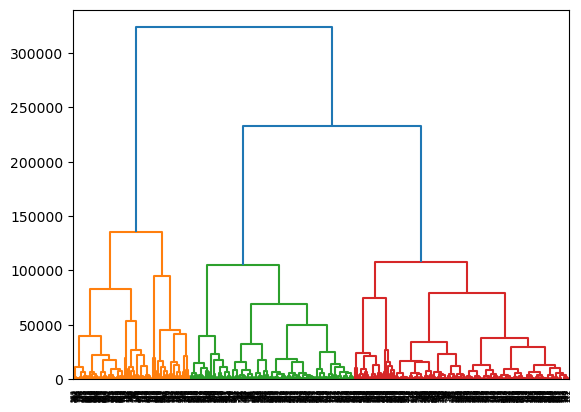

In [20]:
dendrogram(link_data)
plt.show()